# NB01 - Environment Setup and Sanity Checks

## Purpose
This notebook ensures the Kaggle environment is correctly configured to run the Video Summarization pipeline. We check for GPU availability, critical libraries, and video decoding capabilities.

## 1. GPU and CUDA Validation
Most of the models (GoogLeNet, BiLSTM, Transformer) require NVIDIA GPU acceleration for efficient processing.

In [1]:
import torch
import sys
import os

print(f"Python Version: {sys.version}")
print(f"PyTorch Version: {torch.__version__}")
print(f"CUDA Available: {torch.cuda.is_available()}")

if torch.cuda.is_available():
    print(f"GPU Device: {torch.cuda.get_device_name(0)}")
    print(f"CUDA Version: {torch.version.cuda}")
else:
    print("WARNING: No GPU detected. Some notebooks may run extremely slowly.")

Python Version: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
PyTorch Version: 2.8.0+cu126
CUDA Available: True
GPU Device: Tesla P100-PCIE-16GB
CUDA Version: 12.6


## 2. Library and Binary Dependencies
We rely on cv2 (OpenCV) and ffmpeg for video processing.

In [2]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import subprocess

print(f"OpenCV Version: {cv2.__version__}")

try:
    ffmpeg_ver = subprocess.check_output(["ffmpeg", "-version"]).decode().split('\n')[0]
    print(f"FFmpeg Status: {ffmpeg_ver}")
except FileNotFoundError:
    print("ERROR: FFmpeg not found in environment.")

OpenCV Version: 4.12.0
FFmpeg Status: ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers


## 3. Video Sanity Check
Checking if we can read one frame from a sample video in the TVSum dataset.

Successfully decoded one frame from -esJrBWj2d8.mp4


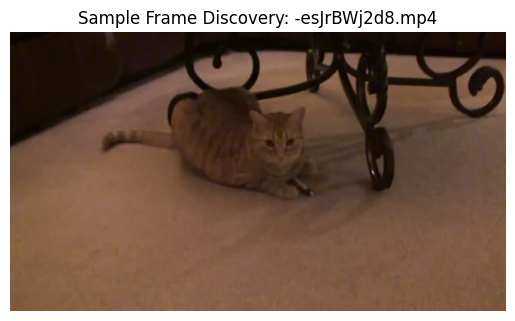

In [3]:
from pathlib import Path

# Updated Kaggle path as per user configuration
KAGGLE_DATASET_ROOT = Path("/kaggle/input/tvsum-videos")

def find_sample_video(root_dir: Path):
    VIDEO_EXTS = {".mp4", ".mkv", ".avi", ".mov", ".webm"}
    for p in root_dir.glob("**/*"):
        if p.suffix.lower() in VIDEO_EXTS:
            return p
    return None

if KAGGLE_DATASET_ROOT.exists():
    sample_path = find_sample_video(KAGGLE_DATASET_ROOT)
    if sample_path:
        cap = cv2.VideoCapture(str(sample_path))
        ret, frame = cap.read()
        if ret:
            print(f"Successfully decoded one frame from {sample_path.name}")
            plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
            plt.title(f"Sample Frame Discovery: {sample_path.name}")
            plt.axis('off')
            plt.show()
        else:
            print(f"Failed to read frame from {sample_path}")
        cap.release()
    else:
        print(f"No video files found in {KAGGLE_DATASET_ROOT}")
else:
    print(f"Dataset path not found: {KAGGLE_DATASET_ROOT}")

## 4. Write Environment Specs
Persistent log for debugging results later.

In [4]:
import json
from pathlib import Path

env_info = {
    "python": sys.version,
    "torch": torch.__version__,
    "cuda": torch.version.cuda if torch.cuda.is_available() else None,
    "opencv": cv2.__version__,
    "gpu_name": torch.cuda.get_device_name(0) if torch.cuda.is_available() else "None"
}

out_dir = Path("results")
out_dir.mkdir(parents=True, exist_ok=True)

with open(out_dir / "env_info.json", "w") as f:
    json.dump(env_info, f, indent=4)

print(f"Environment info saved to {out_dir}/env_info.json")

Environment info saved to data/processed/env_info.json
